# Introduction

The domain-specific area of this project is in the automotive industry, specifically the used cars industry.

Cars are priced according to a variety of factors, including, but not limited to, brand, model, fuel type and more. Figuring out what are reasonable prices to expect is difficult for the average buyer, even more so when buying a used car. Used car dealerships have even more factors to take into consideration when pricing used cars, such as age and mileage, which can result in similar models of cars ranging in prices.

By utilising machine learning, dealerships will be able to reduce the amount of time spent on calculating how to price cars, and at the same time ensure that the prices offered to customers are fair. Customers will be more knowledgeable in what prices to expect when shopping for a used car, thus enabling them to make informed decisions when making a purchase.

For this project, a linear regression algorithm will be used to train the machine learning model. It is an algorithm that can be used to predict values based on other different variables, making it suitable for the purpose of this project, which is to predict the prices of used cars based on their varying features.

The objective of this project is to develop a machine learning model to predict the prices of used cars, with the specific aim of finding out how much a car's history affects its pricing.

# Dataset Description

As the project is aimed specifically at predicting the prices of used cars based on its history, there are several factors to prioritise when finding a dataset. These factors include the car's manufacturing year, its mileage, whether it contains significant damage and its history of accidents. Most importantly, the dataset needs to have the prices of all the cars.

Therefore, for this project, I will be using this dataset acquired from Kaggle.com. The dataset consists of 4009 rows, and contains the following features, including the necessary factors mentioned above:

https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset

 The dataset consists of 4009 rows, and contains the following features:
- Brand & Model: Identify the brand or company name along with the specific model of each vehicle.
- Model Year: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
- Mileage: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
- Fuel Type: Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
- Engine Type: Understand the engine specifications, shedding light on performance and efficiency.
- Transmission: Determine the transmission type, whether automatic, manual, or another variant.
- Exterior & Interior Colors: Explore the aesthetic aspects of the vehicles, including exterior and interior color options.
- Accident History: Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.
- Clean Title: Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.
- Price: Access the listed prices for each vehicle, aiding in price comparison and budgeting.

The brand, model, fuel type, engine type, transmission, exterior and interior colours, accident history and clean title are all strings, while model year, mileage and price are integer values

# Data Preparation

The first step of data preparation is to import the dataset. For the purposes of this project, the dataset was downloaded from the above Kaggle link as a CSV file, and uploaded to my Google Drive. The following code accesses the dataset from there and, using pandas, reads the CSV file into a local dataframe.

In [ ]:
import pandas as pd
import numpy as np

URL = "https://drive.google.com/file/d/1DzDvNQ5mV3OA_B0wbAd9dWQdKdeoEXse/view?usp=sharing"
FILE_PATH = "https://drive.google.com/uc?export=download&id=" + URL.split("/")[-2]

df = pd.read_csv(FILE_PATH)

In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
# data types of each column in the dataframe
df.dtypes

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object

According to the above output, only one of the fields contain integer values. As the algorithm to be used is linear regression, it requires fields containing numerical values to be used for training the model.

For the 'milage' and 'price' columns, they can be converted to numerical values. The values in these columns currently do not qualify as numerical values as they contain extra characters like commas and letter. Thus to convert them the first step is to remove these characters.

There are also null values present in the columns 'fuel_type', 'accident' and 'clean_title'. These columns will be further explored by finding all the unique values of each column.

In [ ]:
# milage
# remove ' mi.' from the end of the strings
df['milage'] = df['milage'].str.rstrip(' mi.')
# remove commas
df['milage'] = df['milage'].str.replace(',','')

# price
# remove '$' from the start of the strings
df['price'] = df['price'].str.lstrip('$')
# remove commas
df['price'] = df['price'].str.replace(',','')

In [ ]:
# convert to int
df['milage'] = df['milage'].astype(int)
df['price'] = df['price'].astype(int)
df.dtypes

brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

The 'accident' and 'clean_title' fields can be converted to binary, as the contents of those fields indicated whether or not each car has fulfilled its criteria.

In [ ]:
print("Unique values of accident:", df.accident.unique())
print("Unique values of clean_title:", df.clean_title.unique())

Unique values of accident: ['At least 1 accident or damage reported' 'None reported' nan]
Unique values of clean_title: ['Yes' nan]


According to the unique values of 'clean_title', it only contains the value 'Yes', indicating the presence or absence of a clean title. To resolve this, I will use the number 1 to indicate the car's possesstion of a clean title, and the number 0 to indicate its absence.

In [ ]:
# convert NaN values in 'clean_title' to 0
df[['clean_title']] = df[['clean_title']].fillna(0)
# convert 'Yes' to 1
df['clean_title'] = df['clean_title'].replace('Yes', 1)

The unique values of 'accident' indicate whether or not an accident involving the car was reported, as well as null values. Due to the ambiquity of the cars' accident status (a car may have been in an accident, but was not reported), the null values will be considered as an indication that there was no accident reported.

Therefore, an accident reported will be indicated by 1, while no accident reported or null values will be indicated by 0.

In [ ]:
# convert 'At least 1 accident or damage reported' to 1
df['accident'] = df['accident'].replace('At least 1 accident or damage reported', 1)
# convert 'None reported' to 0
df['accident'] = df['clean_title'].replace('None reported', 0)
# convert NaN values in to 0
df[['accident']] = df[['accident']].fillna(0)

In [ ]:
df.dtypes

brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident         int64
clean_title      int64
price            int64
dtype: object

In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,1,1,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,1,1,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,0,0,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,1,1,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,0,0,34999


# Statistical Analysis

In [ ]:
df.describe()

,model_year,milage,accident,clean_title,price
count,4009.000000,4009.000000,4009.000000,4009.000000,4.009000e+03
mean,2015.515590,64717.551010,0.851334,0.851334,4.455319e+04
std,6.104816,52296.599459,0.355803,0.355803,7.871064e+04
min,1974.000000,100.000000,0.000000,0.000000,2.000000e+03
25%,2012.000000,23044.000000,1.000000,1.000000,1.720000e+04
50%,2017.000000,52775.000000,1.000000,1.000000,3.100000e+04
75%,2020.000000,94100.000000,1.000000,1.000000,4.999000e+04
max,2024.000000,405000.000000,1.000000,1.000000,2.954083e+06


'model_year' has the standard deviation of 5.83, which shows that the majority of the years the models in the dataset were manufatured tends to stay within around 5 years of the mean 'model_year'. As the mean of 'model_year' is 2015.6, this shows that the manufacturing years of most of the models range around 2010 to 2020, so most of the cars in the dataset are relatively new.

On the other hand, the standard deviation for 'milage' is 52127.8, which shows that there is a wide variation in the amount of milage. The standard deviation for 'price' is 78584.55, which indicates that the prices in this dataset vary greatly.

# Data Visualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

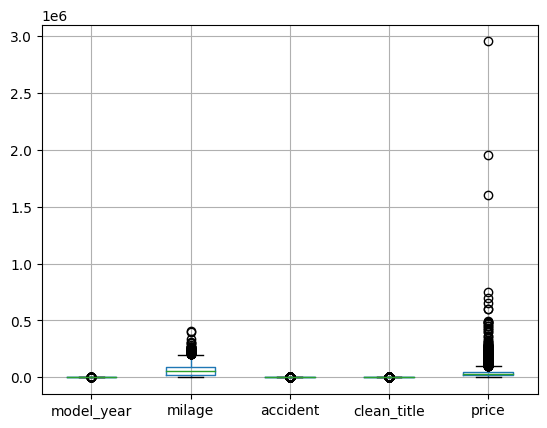

In [ ]:
df.boxplot()

As seen from this boxplot, the range of values for prices vary widely, however, it has three datapoints that appear to be far beyond the range of the majority of datapoints. As these data points could result in skewness, the rows containing these values should be removed.

In [ ]:
# Find the indices of the top three largest values
top_three_indices = df['price'].nlargest(3).index

# Drop rows with the top three largest values
df.drop(index=top_three_indices, inplace=True)

<Axes: >

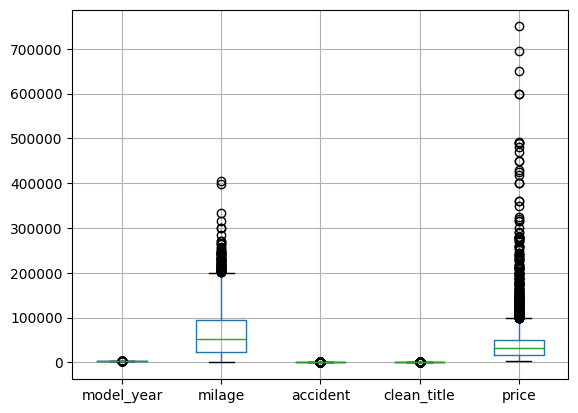

In [ ]:
df.boxplot()

This is an improvement over the previous box plot, however, the range of prices is still too large.

In [ ]:
# Find the indices of the top five largest values
top_five_indices = df['price'].nlargest(5).index

# Drop rows with the top five largest values
df.drop(index=top_five_indices, inplace=True)

<Axes: >

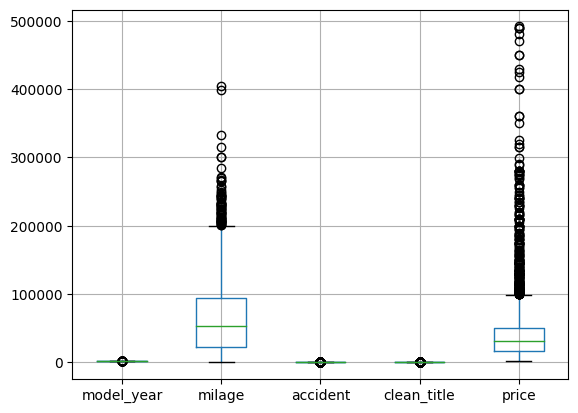

In [ ]:
df.boxplot()

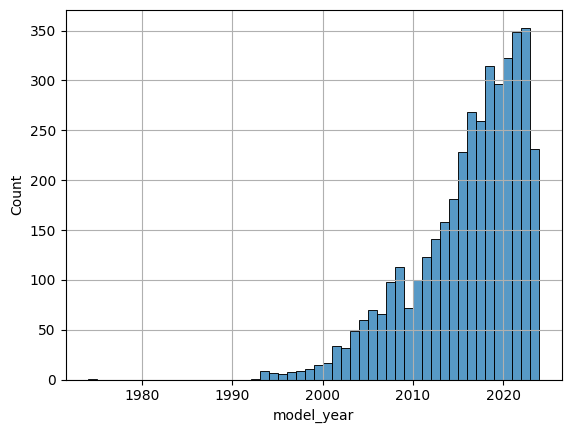

In [ ]:
sns.histplot(data=df['model_year'])
plt.grid()

The boxplot of 'model_year' does not show a wide range of values, although that may be due to the boxplot being shown alongside the boxplots of the other fields, which have for wider ranges. Looking at its histogram, however, shows that the majority of cars have the model year around 2020, with one outlier value from before 1980.

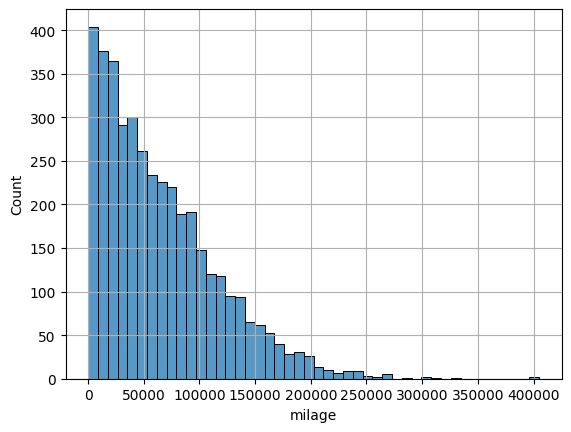

In [ ]:
sns.histplot(data=df['milage'])
plt.grid()

The histogram for 'milage' shows that the majority of cars in the dataset have mileages of under 50,000, while cars with higher mileages are the minority in this dataset.

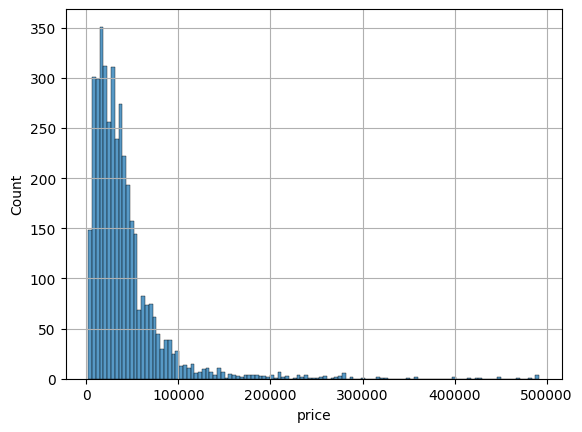

In [ ]:
sns.histplot(data=df['price'])
plt.grid()

Although the higher values in 'price' have been dropped from the dataset, the histogram shows that there are still some outliers from the 30,000 to 50,000 range. I have considered dropping these values, however, the number of cars with prices in this range is not insignificant, and dropping these values might affect the accuracy of the predictions.

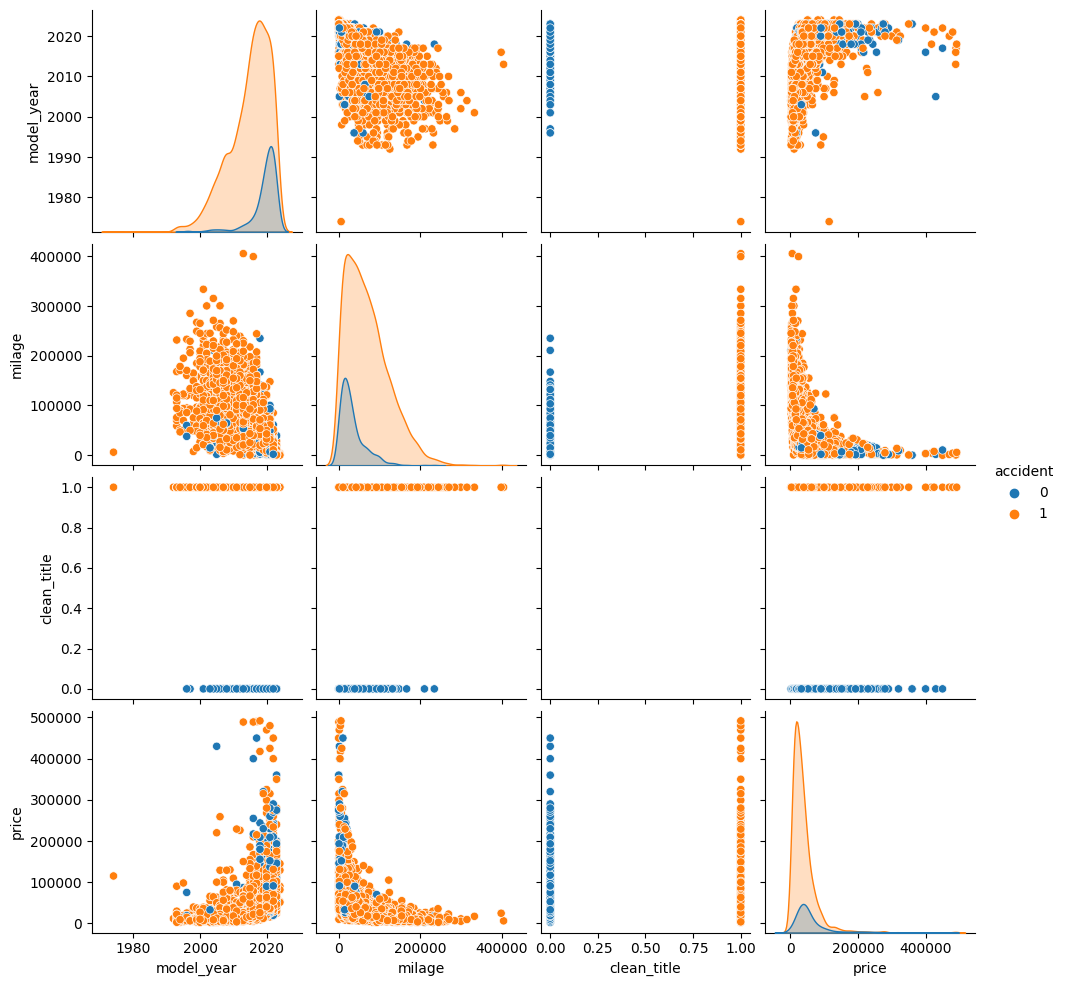

In [ ]:
sns.pairplot(df, hue="accident")

This pairplot shows that the number of cars that have been in accidents outnumber the cars that have not. From the bottom right graph, it appears that the prices of the cars are in largely the same range, regardless of whether it has been in an accident. It also appears that cars that have not been in accidents generally have a lower mileage, as seen from the second column of graphs. However, as the number of cars that have not been in accidents are far fewer, it is not known if there is a connection between these two factors, or if it is a coincidence.

From this pairplot, it is clear that there is a connection between cars that have been in accidents, and cars that hold clean titles. In the third row of graphs, the cars with clean titles have the value of '1', and the graphs show that cars with clean titles are also the cars that are recorded to have been in accidents, and the cars without clean titles are the cars that have no recorded accidents. This is interesting, as in order for a car to have a clean title, it has to have little to no damage, and usually cars that have been in accidents would have some damage. However, it should be noted that the dataset does not state whether a car has undergone repairs or has any present damage, and a car not having any recorded accidents does not mean that the car is without damage.

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

As the model is a linear regression model, the features have to consist of numerical values. Not only are the following features chosen numerical, but they are also significant factors in the pricing of used cars, as seen from the previous models, as well as relevant to the aim of this project, which is to find out how the history of a used car affects it pricing.

In [ ]:
features = df[['model_year', 'milage', 'accident', 'clean_title']]

target = df['price']

In [ ]:
#split dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size = 0.20
)

As this is a rather large dataset, scaling will be performed in order to produce more accurate results.

In [ ]:
sc = StandardScaler()
sc.fit(X_train) #Create mould
X_train_scale = sc.transform(X_train)
X_test_scale = sc.transform(X_test)

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train_scale, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scale)

# Data Validation

In order to validate the model, cross validation, visualisation and scoring the model will be used.

In [ ]:
from sklearn.metrics import mean_squared_error

Using mean squared error, the average squared difference between the predicted and real values is found. The larger the mean squared error, the greater the errors in predicting the real values.

This method will be used to score the model, with the aim of getting the score as low as possible.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 2049402038.8560781


## Visualisation

The predicted prices will be plotted against the actual prices, with a different feature focused on in each graph.

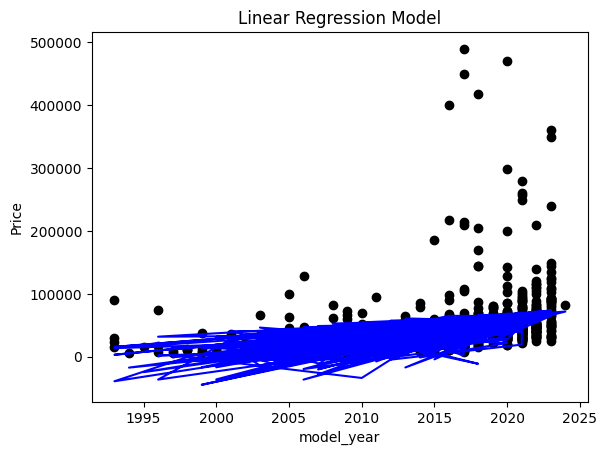

In [ ]:
# Plot the data and the regression line
plt.scatter(X_test['model_year'], y_test, color='black')
plt.plot(X_test['model_year'], y_pred, color='blue')
plt.title('Linear Regression Model')
plt.xlabel('model_year')
plt.ylabel('Price')
plt.show()

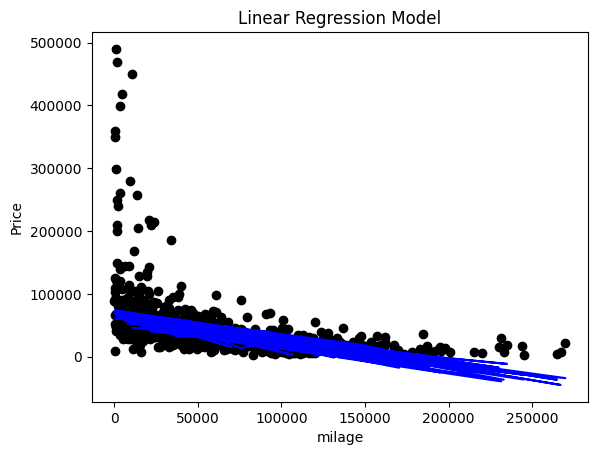

In [ ]:
# Plot the data and the regression line
plt.scatter(X_test['milage'], y_test, color='black')
plt.plot(X_test['milage'], y_pred, color='blue')
plt.title('Linear Regression Model')
plt.xlabel('milage')
plt.ylabel('Price')
plt.show()

The above graphs plot the actual prices as a scatter plot, then plots the predicted prices as a line plot.

Comparing the graphs, the graph plotting against the x-axis of 'milage' depicts a clearer correlation, than the graph lotted against 'model_year'.

This indicates that 'milage' is a more important factor in predicting accurate prices than 'model_year'.

From these graphs, it is also clear that the model has predicted negative results, which should not happen as the prices of used cars should not be negative.

## Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
# Specify the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [ ]:
# Perform cross-validation and calculate mean squared error
mse_scores = cross_val_score(model, features, target, scoring='neg_mean_squared_error', cv=kf)
rmse_scores = np.sqrt(-mse_scores)

In [ ]:
# Print the cross-validation scores
print(f'Cross-Validation RMSE Scores: {rmse_scores}')
print(f'Mean RMSE: {np.mean(rmse_scores)}')

Cross-Validation RMSE Scores: [41976.01866207 35333.29593837 40019.12245711 45422.49487917
 36272.30993206]
Mean RMSE: 39804.64837375668


# Feature Engineering

In [ ]:
# create age column by subtracting 'model_year' from current year
df['age'] = 2023 - df['model_year']

In [ ]:
# create milage_per_yr by dividing 'milage' by 'age'
# if age = 0, divide by 1
df['milage_per_yr'] = np.where(df['age'] == 0, df['milage'] / 1, df['milage'] / df['age'])

In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,age,milage_per_yr
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,1,1,10300,10,5100.0
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,1,1,38005,2,17371.0
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,0,0,54598,1,22372.0
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,1,1,15500,8,11112.5
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,0,0,34999,2,4917.5


# New model

In [ ]:
features = df[['model_year', 'milage', 'accident', 'clean_title', 'milage_per_yr']]

target = df['price']

In [ ]:
#split dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size = 0.20
)

In [ ]:
sc = StandardScaler()
sc.fit(X_train) #Create mould
X_train_scale = sc.transform(X_train)
X_test_scale = sc.transform(X_test)

In [ ]:
# Create a linear regression model
new_model = LinearRegression()

# Train the model on the training set
new_model.fit(X_train_scale, y_train)

# Make predictions on the test set
y_pred = new_model.predict(X_test_scale)

In order to resolve the issue of negative predictions, the threshold for predictions will be set to the lowest value in 'price'

In [ ]:
# Minimum threshold for predictions
threshold = df['price'].min()

# After obtaining predictions, apply the threshold
y_pred = np.maximum(y_pred, threshold)

# Evaluation

## Mean squared error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

1799385037.406086


## Cross validation

In [ ]:
# Perform cross-validation and calculate mean squared error
mse_scores = cross_val_score(new_model, features, target, scoring='neg_mean_squared_error', cv=kf)
rmse_scores = np.sqrt(-mse_scores)

In [ ]:
# Print the cross-validation scores
print(f'Cross-Validation RMSE Scores: {rmse_scores}')
print(f'Mean RMSE: {np.mean(rmse_scores)}')

Cross-Validation RMSE Scores: [41509.22308348 35032.6047088  39359.29708266 45226.6445195
 35393.48513575]
Mean RMSE: 39304.25090603602


The mean squared error of the model has improved. Rounded off to whole numbers, the original value was 2049402039, and the new model's mean squared error is 1799385037. The decrease in mean squared error indicates that the new model produces more accurate predictions than the original model. Although the new model is still far from perfect, the decrease in the mean squared error indicates its improvement.

Cross validation was also conducted on both the first and second models. Root Mean Squared Error(RMSE) was used for cross validation. It is a suitable metric for conducting the cross validation as it measures the size of the difference in errors, thus making it suitable for measuring the accuracy of a linear regression model, which produces numerical prediction.

There is a decrease in the mean RMSE of each model, rounded off as 39805 for the first model, and 39304 for the second. The cross validation RMSE scores remain roughly the same for each fold of each model, although for each fold, the scores of second model shows a slight decrease.
These scores indicate that the second model has improved on the first model's predictions in terms of accuracy, although the improvement is not a significant amount.
Considering the results produced from the models, there is still a long way to go in creating a linear regression model that can accurately predict used car prices based on its historical factors.

There is still merit in the concept, as some of the graphs, such as the scatterplot for 'milage', and the pairplots for 'accidents' and 'clean_title', depict clear correlations between the price of the car and the aforementioned factors.

This idea is still applicable to this industry, as well as others, such as housing, which also has a large market in resale properties.

